## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [87]:
import tensorflow as tf
tf.__version__

'2.3.0'

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [88]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [94]:
print('No. of samples in training data = ',x_train.shape[0])
print('No. of samples in testing data = ',x_test.shape[0])

No. of samples in training data =  60000
No. of samples in testing data =  10000


### Find dimensions of an image in the dataset

In [95]:
print('Image dimensions are = ',x_train[1].shape)

Image dimensions are =  (28, 28)


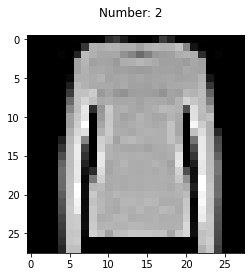

In [96]:
#Let's review the data
import matplotlib.pyplot as plt
import numpy as np

img_num = np.random.randint(0, x_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset

plt.imshow(x_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [97]:
#Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [98]:
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')

In [99]:
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [100]:
x_train = x_train.reshape([-1,28,28,1])
x_test = x_test.reshape([-1,28,28,1])

### Import the necessary layers from keras to build the model

In [101]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [102]:
#Adding first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 input_shape = (28,28,1),
                                 activation='relu'))

#normalizing data
model.add(tf.keras.layers.BatchNormalization())

#Adding second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalizing data
model.add(tf.keras.layers.BatchNormalization())

#Flattening the output
model.add(tf.keras.layers.Flatten())

#Adding 2 fully connected dense layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [103]:
#Creating the early stopping callback instance
from tensorflow.keras import callbacks
es = callbacks.EarlyStopping(patience = 5, monitor = 'loss')

In [104]:
#Compiling the model using adam optimizer and categorical_crossentropy as the loss function
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [105]:
#Running this model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size = 256)

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4250 - accuracy: 0.8537 - val_loss: 2.2758 - val_accuracy: 0.3234
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.2348 - accuracy: 0.9131 - val_loss: 1.6498 - val_accuracy: 0.5824
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1655 - accuracy: 0.9398 - val_loss: 0.2782 - val_accuracy: 0.8991
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1140 - accuracy: 0.9579 - val_loss: 0.2993 - val_accuracy: 0.9040
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0728 - accuracy: 0.9736 - val_loss: 0.3467 - val_accuracy: 0.9075
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0568 - accuracy: 0.9798 - val_loss: 0.4410 - val_accuracy: 0.8967
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0389 - accuracy: 0.9862 - val_loss: 0.4108 - val_accuracy: 0.9042

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [106]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Adding first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 input_shape = (28,28,1),
                                 activation='relu'))

#normalizing data
model.add(tf.keras.layers.BatchNormalization())

#Adding second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalizing data
model.add(tf.keras.layers.BatchNormalization())

#Adding maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#Flattening the output
model.add(tf.keras.layers.Flatten())

#Adding 2 fully connected dense layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [107]:
#Compiling the model using adam optimizer and categorical_crossentropy as the loss function
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [108]:
#Training the model and adding the early stopping callback with patience 5
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size = 256,
         callbacks=[es])

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4591 - accuracy: 0.8407 - val_loss: 2.7702 - val_accuracy: 0.2739
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2753 - accuracy: 0.9000 - val_loss: 0.6581 - val_accuracy: 0.7528
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2112 - accuracy: 0.9224 - val_loss: 0.2730 - val_accuracy: 0.9037
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1749 - accuracy: 0.9346 - val_loss: 0.2495 - val_accuracy: 0.9109
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1436 - accuracy: 0.9476 - val_loss: 0.2760 - val_accuracy: 0.9094
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1243 - accuracy: 0.9541 - val_loss: 0.2594 - val_accuracy: 0.9167
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0957 - accuracy: 0.9639 - val_loss: 0.2913 - val_accuracy: 0.9153

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [113]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=30,
                             shear_range=0.2,
                             zoom_range=0.3)
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

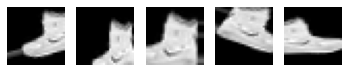

In [114]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [115]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=256), validation_data = (x_test, y_test), 
                     epochs = 10, callbacks=[es])


Epoch 1/10
235/235 [==============================] - 14s 62ms/step - loss: 0.5927 - accuracy: 0.7812 - val_loss: 0.5628 - val_accuracy: 0.7979
Epoch 2/10
235/235 [==============================] - 14s 61ms/step - loss: 0.5656 - accuracy: 0.7903 - val_loss: 0.5684 - val_accuracy: 0.8024
Epoch 3/10
235/235 [==============================] - 14s 62ms/step - loss: 0.5580 - accuracy: 0.7952 - val_loss: 0.7522 - val_accuracy: 0.7303
Epoch 4/10
235/235 [==============================] - 14s 61ms/step - loss: 0.5445 - accuracy: 0.8004 - val_loss: 0.5776 - val_accuracy: 0.7944
Epoch 5/10
235/235 [==============================] - 15s 62ms/step - loss: 0.5301 - accuracy: 0.8041 - val_loss: 0.5465 - val_accuracy: 0.8003
Epoch 6/10
235/235 [==============================] - 15s 62ms/step - loss: 0.5250 - accuracy: 0.8062 - val_loss: 0.7624 - val_accuracy: 0.7325
Epoch 7/10
235/235 [==============================] - 15s 64ms/step - loss: 0.5159 - accuracy: 0.8101 - val_loss: 0.6484 - val_accuracy:

###  Report the final train and validation accuracy

In [116]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
train_loss, train_accuracy = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5793 - accuracy: 0.7893


In [117]:
print('Final Training Accuracy = ',  train_accuracy)
print('Final Testing Accuracy = ',test_accuracy)

Final Training Accuracy =  0.7893000245094299
Final Testing Accuracy =  0.7810999751091003


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [119]:
#importing imagedatagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [144]:
#Loading the dataset
(x_train_c, y_train_c), (x_test_c, y_test_c) = tf.keras.datasets.cifar10.load_data()

In [145]:
#Number of training samples
x_train_c.shape

(50000, 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [147]:
#Creating the image data generator object
datagen_v2 = ImageDataGenerator(rotation_range=30,horizontal_flip=True,width_shift_range=0.2,height_shift_range=0.2)

### **Prepare/fit the generator.**

In [148]:
#Normalizing the data
x_train_c = x_train_c.astype('float32')
x_train_c=x_train_c/255

In [149]:
#Fitting the generator on the training data
datagen_v2.fit(x_train_c)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

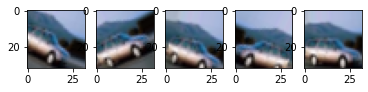

In [150]:
#Using a loop to show 5 augmented images of the 4th image
gen = datagen_v2.flow(x_train_c[4:5], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("on")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()